In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
from scipy import stats


In [3]:
file5 = 'zillow/State_time_series.csv'
raw5_df = pd.read_csv(file5)
state_df = raw5_df.copy()
# group by state and return all time mean
statesall_mean = state_df.groupby(['RegionName'])['ZHVI_AllHomes'].mean()

# Avg Home Price of each State 
 [] a brief intro for state vs avg home price analysis before time series analysis on next section
 [] calculate average of total home prices per state and show on y_axis
 [] scatter final average number with states on x_axis

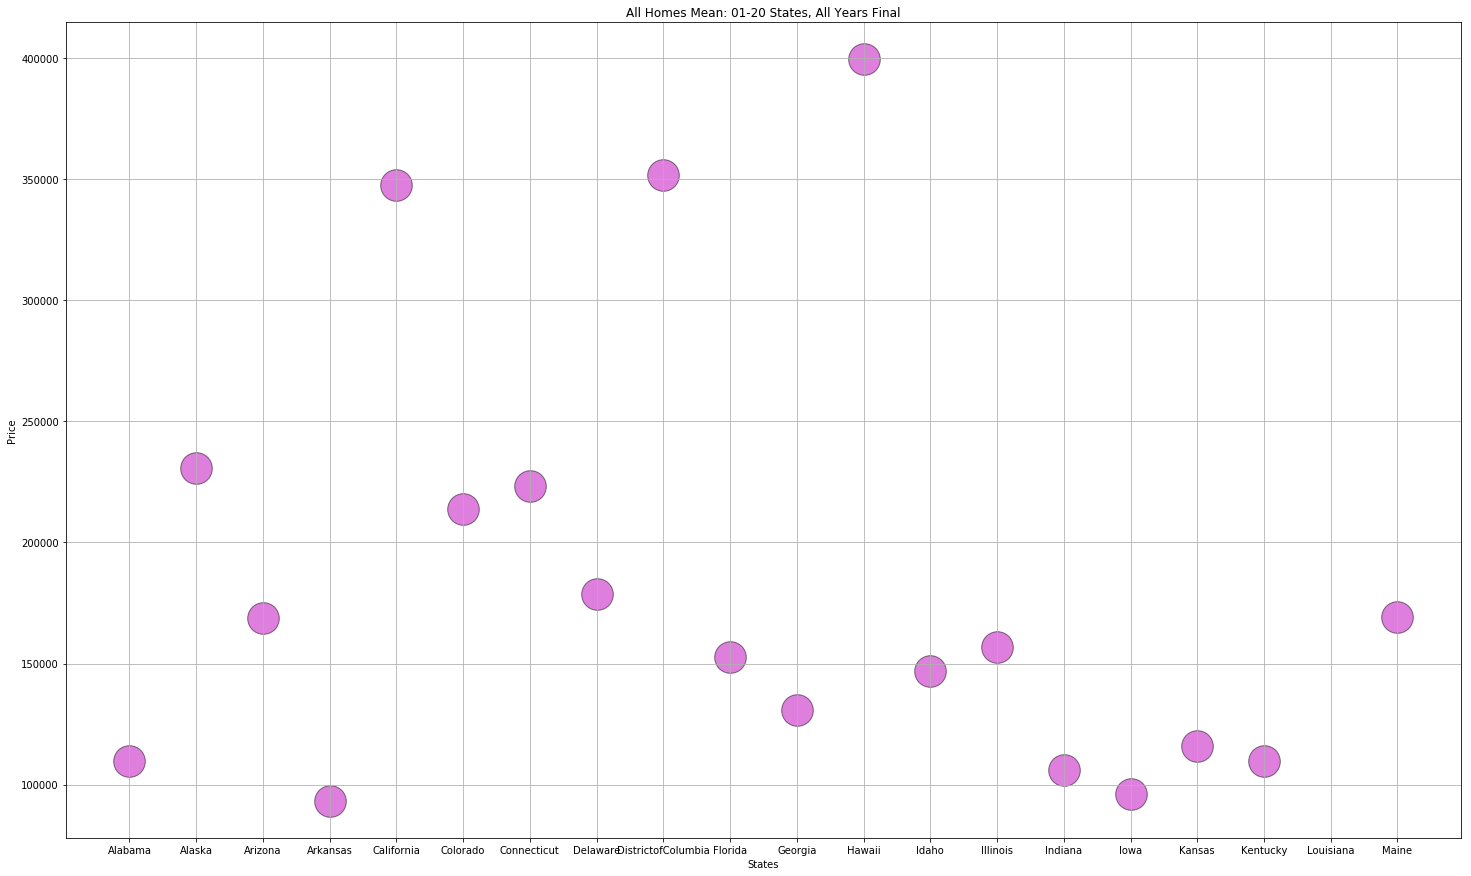

In [4]:
# scatter plot states 0-20 
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 01-20 States, All Years Final")
plt.scatter(statesall_mean.index[:20], statesall_mean[:20],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

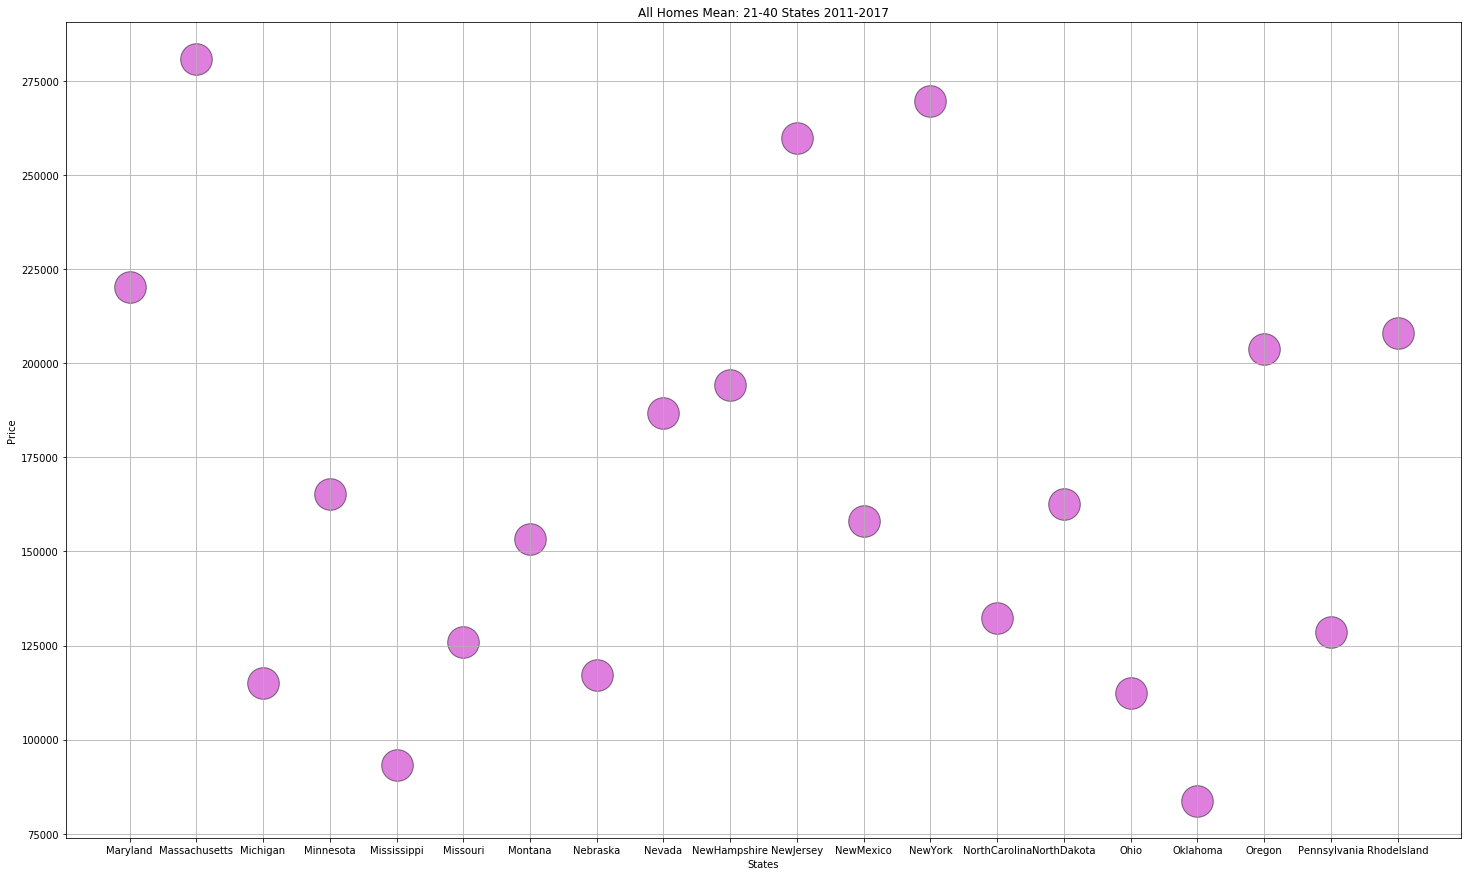

In [5]:
# scatter plot states 21-40
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 21-40 States 2011-2017")
plt.scatter(statesall_mean.index[20:40], statesall_mean[20:40],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

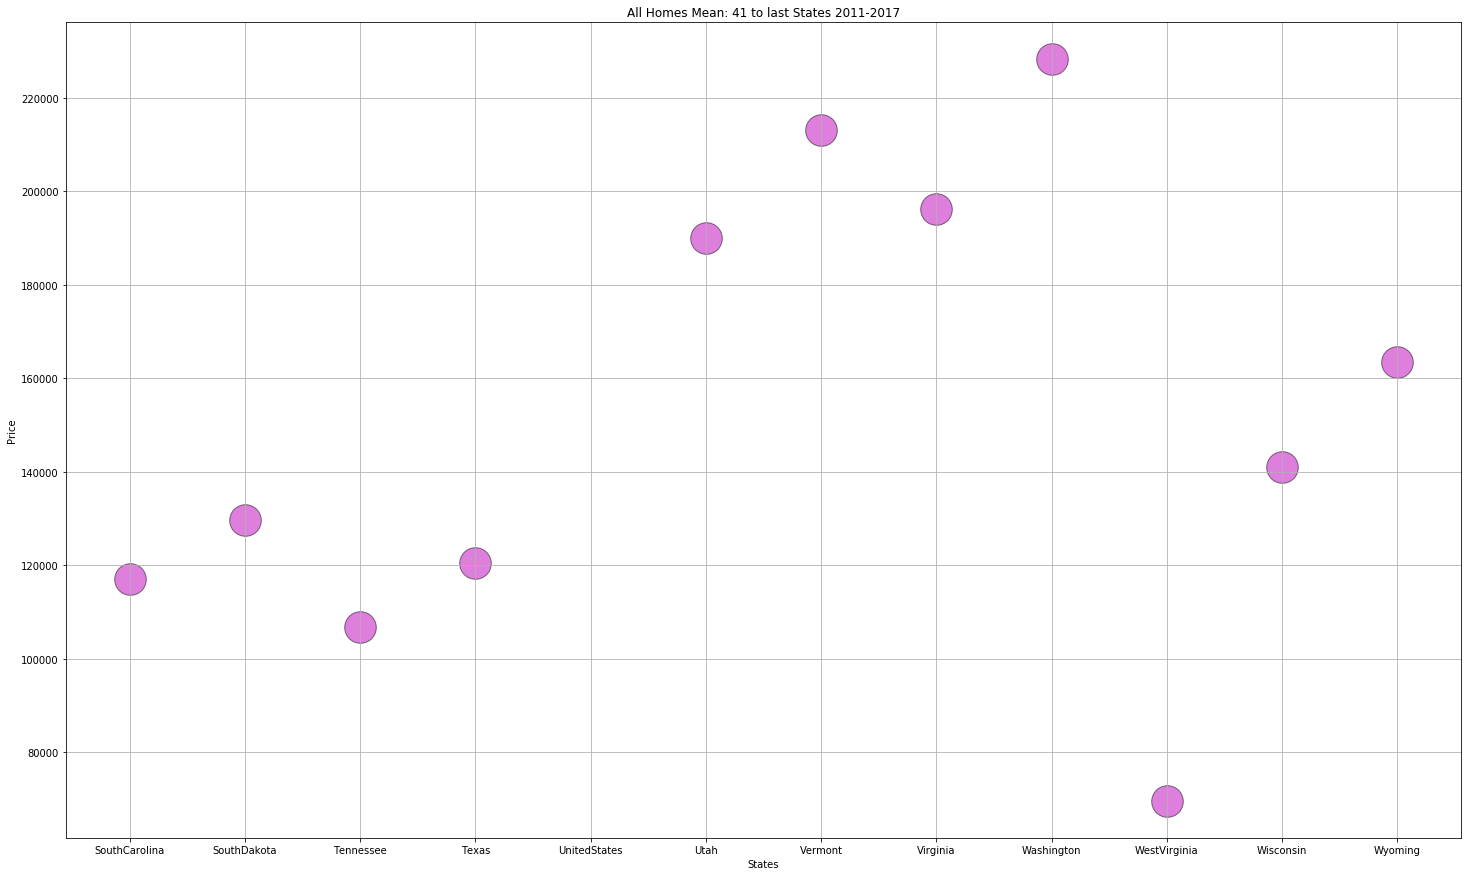

In [6]:
# scatter plot states 41-
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 41 to last States 2011-2017")
plt.scatter(statesall_mean.index[40:], statesall_mean[40:],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

# Data Visualization with Time Series Approach
     [] convert date (ie. 1996-04-30) to a date time format so target time period could be extracted
     [] extreme volatility on months not preferred thus analysis will be limited to years as per time period
     [] crucial library import datetime as dt

In [7]:
# Year needs to be extracted in order to determine increase per year
# state_df['Date'].head()
state_df['dt_Date'] = pd.to_datetime(state_df['Date'])
# state_df['dt_Date'].count() 13212
state_df['Year'] = state_df['dt_Date'].dt.year
# state_df['Year'] will be required for next groupby object

# state_df['Year'].unique()
# array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
#        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean() returns an array
dummyst = state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean()
stateMeanYear_df = dummyst.reset_index()
stateMeanYear_df
# pivoted the table with years on index, states on columns and average home price as values
stateMeanYear_pdf = stateMeanYear_df.pivot(index='Year', columns = 'RegionName', values = 'ZHVI_AllHomes')
stateMeanYear_pdf.head(10)

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,79866.666667,NaN,104633.333333,64355.555556,157322.222222,129500.000000,132900.000000,108511.111111,NaN,86577.777778,...,71577.777778,NaN,NaN,128577.777778,NaN,112666.666667,135444.444444,39866.666667,NaN,NaN
1997,81358.333333,NaN,108308.333333,66833.333333,161108.333333,135083.333333,136050.000000,110466.666667,NaN,88908.333333,...,75366.666667,83254.545455,NaN,136891.666667,NaN,114633.333333,141700.000000,40833.333333,100900.000000,NaN
1998,84950.000000,175466.666667,113850.000000,69150.000000,172341.666667,142775.000000,141525.000000,113791.666667,NaN,92833.333333,...,80933.333333,86433.333333,NaN,142483.333333,NaN,117650.000000,150558.333333,43800.000000,104900.000000,99277.777778
1999,89475.000000,171400.000000,118933.333333,70075.000000,188500.000000,155775.000000,150075.000000,117200.000000,130114.285714,97658.333333,...,84633.333333,91733.333333,NaN,148733.333333,NaN,122183.333333,159308.333333,46391.666667,111566.666667,102333.333333
2000,91941.666667,174025.000000,127208.333333,72400.000000,215966.666667,174233.333333,163558.333333,124816.666667,144600.000000,105441.666667,...,87491.666667,95725.000000,NaN,157333.333333,NaN,129950.000000,168591.666667,48100.000000,116650.000000,109125.000000
2001,94416.666667,177375.000000,133191.666667,75600.000000,246400.000000,192341.666667,178516.666667,132100.000000,160516.666667,115341.666667,...,90458.333333,98808.333333,NaN,163075.000000,NaN,140033.333333,176533.333333,49575.000000,123833.333333,118100.000000
2002,96916.666667,181341.666667,140066.666667,77408.333333,280541.666667,201633.333333,199125.000000,143558.333333,200991.666667,127633.333333,...,92708.333333,102783.333333,NaN,165258.333333,NaN,152816.666667,184433.333333,51116.666667,129625.000000,123200.000000
2003,99858.333333,191516.666667,149425.000000,82000.000000,331108.333333,206975.000000,224916.666667,160091.666667,251116.666667,142716.666667,...,96500.000000,106958.333333,NaN,164841.666667,183375.000000,169416.666667,194700.000000,53916.666667,137375.000000,129966.666667
2004,105641.666667,208358.333333,165558.333333,87516.666667,410508.333333,212458.333333,251708.333333,179391.666667,309308.333333,166800.000000,...,100908.333333,115183.333333,NaN,167666.666667,204491.666667,198166.666667,212841.666667,56216.666667,142983.333333,142508.333333


# Avg Home Prices over Years per State
    [] draw a continuous line plot to show price change over the years of data
    [] plot average home price for each state by iteration through columns on same chart with legend
    [] divide states into four and show in four different figures for easy read    

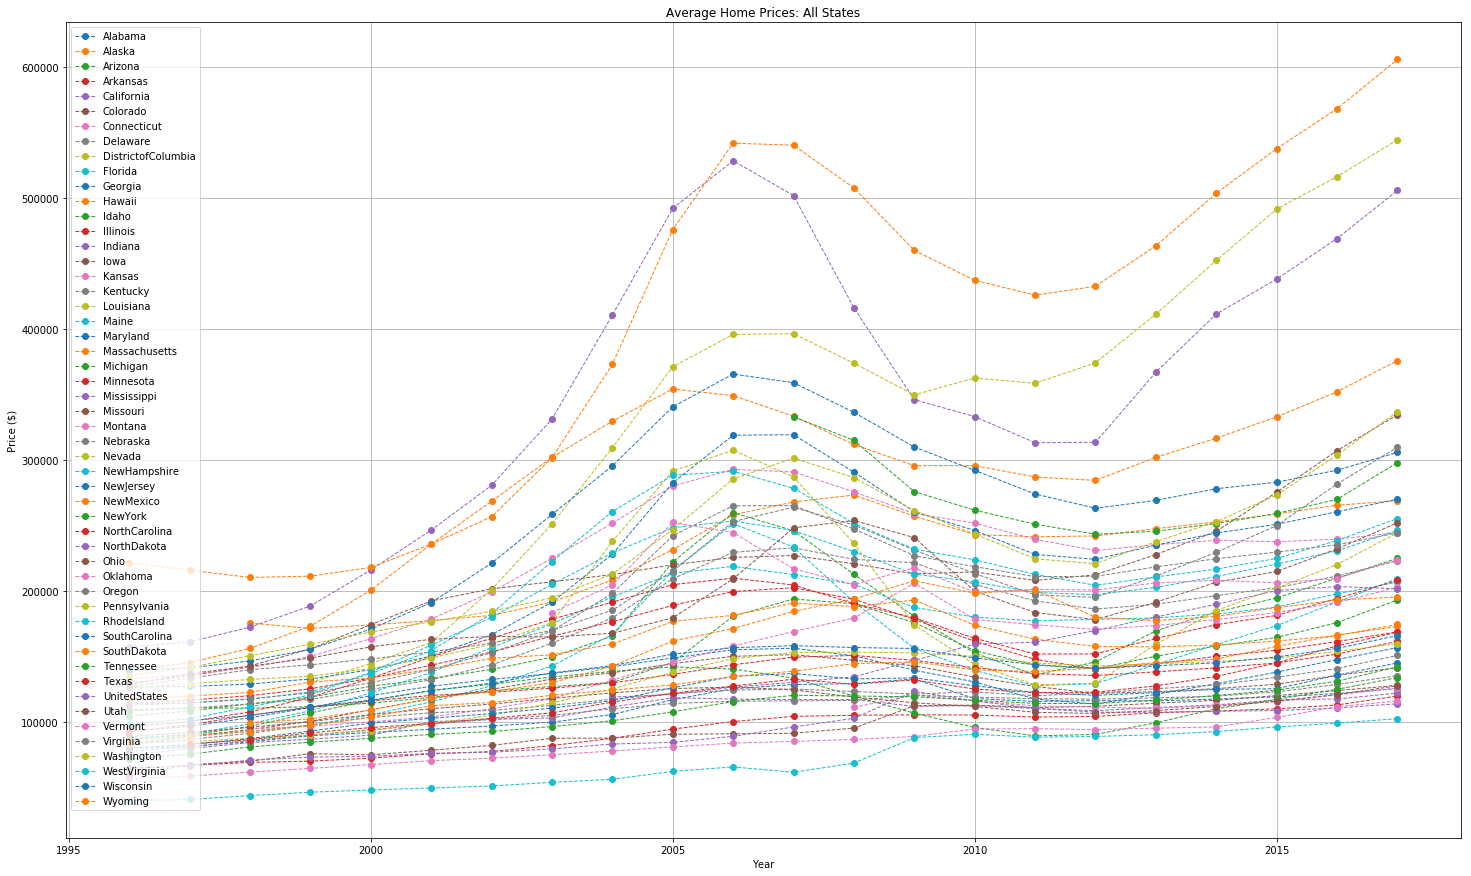

In [8]:
# pre-styling plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: All States")
plt.xlabel("Year")
plt.ylabel(" Price ($) ")

for state in stateMeanYear_pdf.columns:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linewidth=1, linestyle='--', marker = 'o',label=state)
        plt.legend(loc='best')
plt.show()

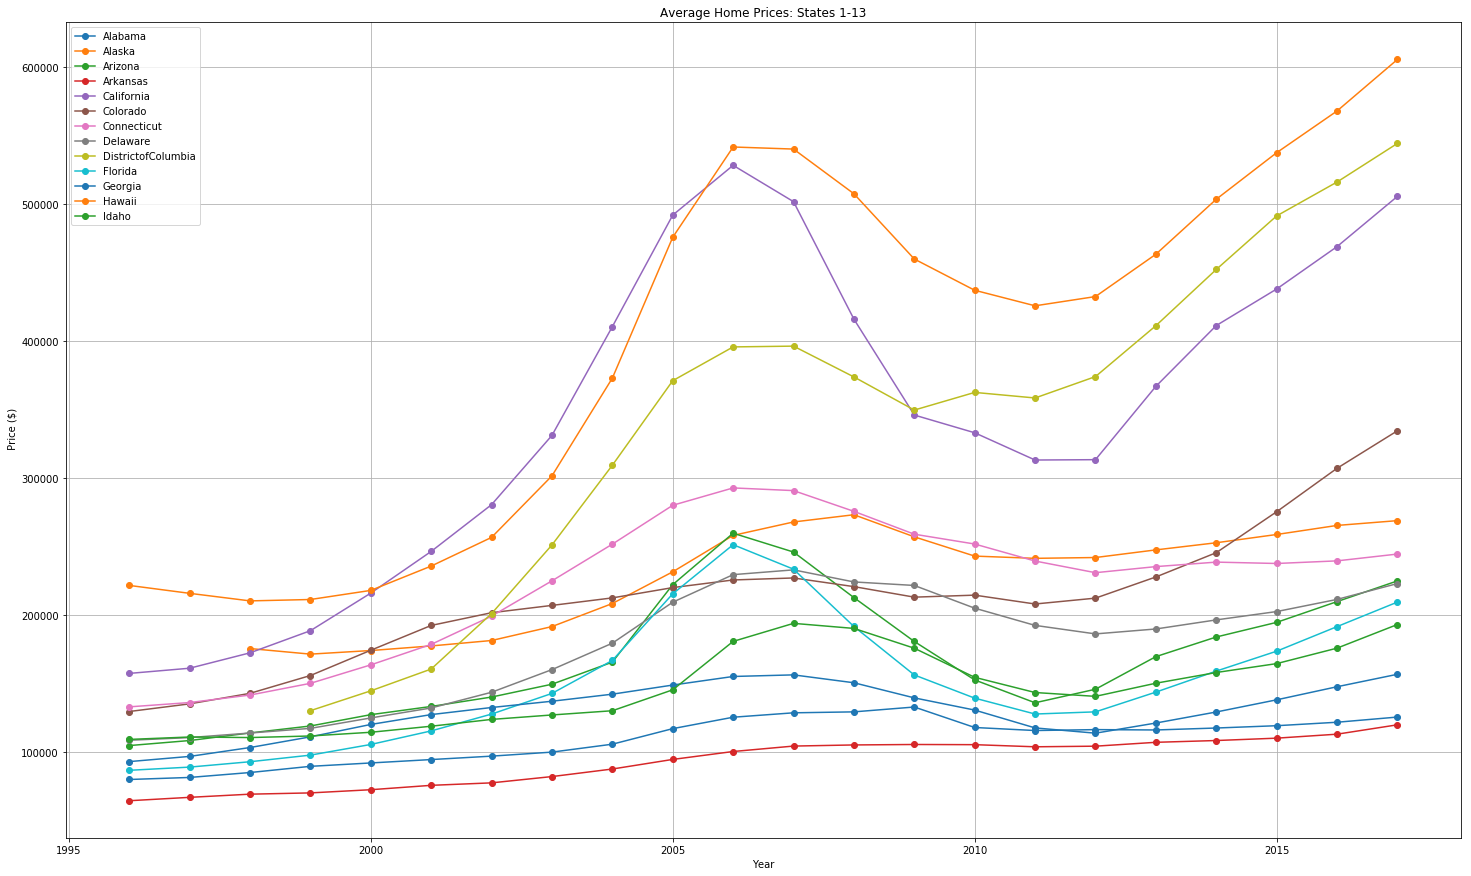

In [9]:
quarter_states = int(len(stateMeanYear_pdf.columns)/4)

plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 1-13")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[:quarter_states]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], marker = 'o',label=state)
        plt.legend(loc='best')
plt.show()

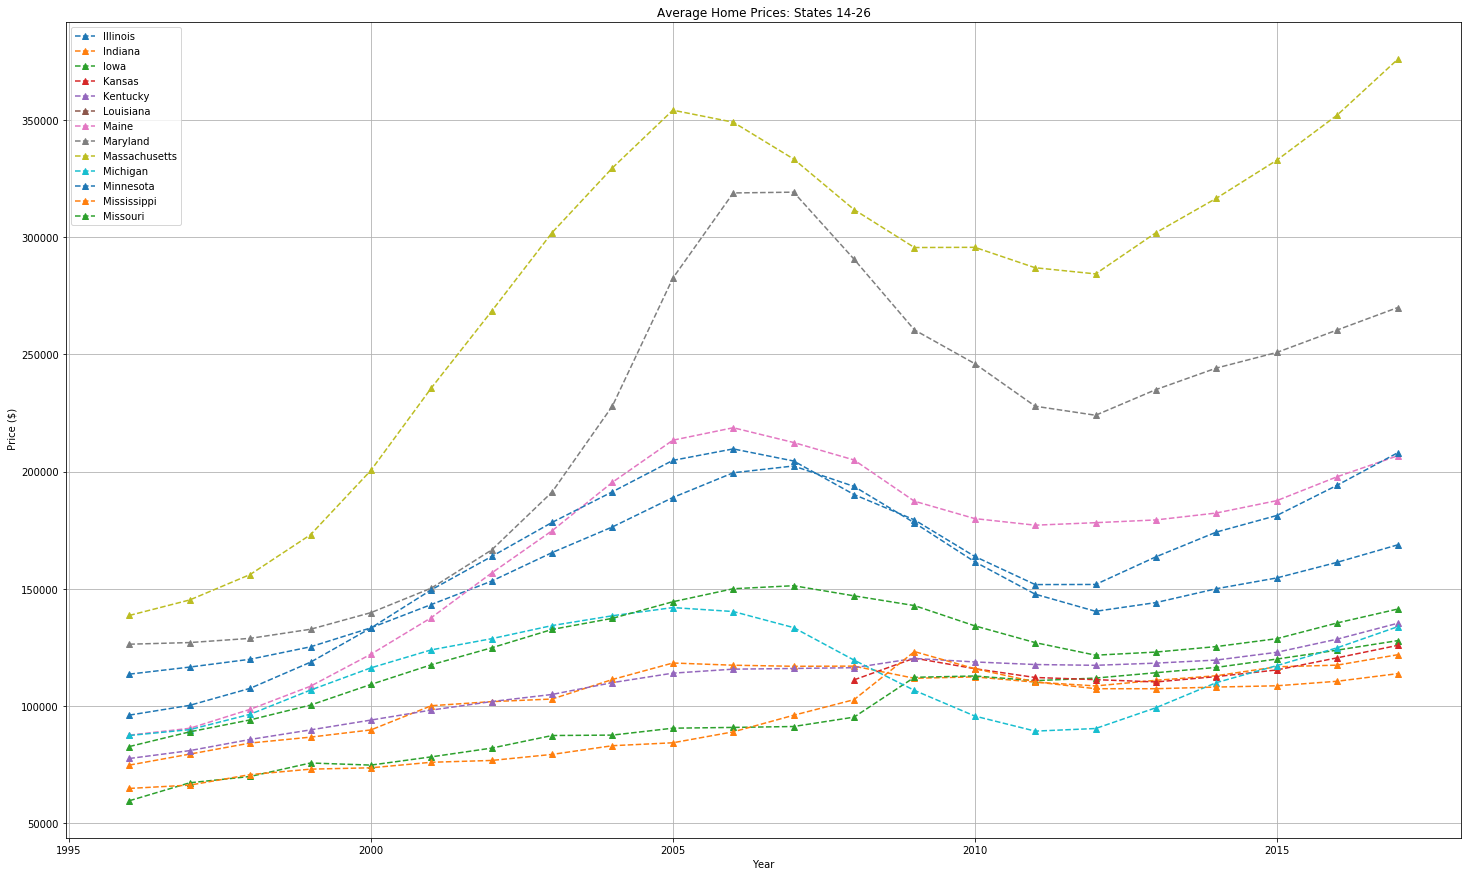

In [10]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 14-26")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[quarter_states:(quarter_states*2)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state],linestyle='--', marker = '^',label=state)
        plt.legend(loc='best')
plt.show()


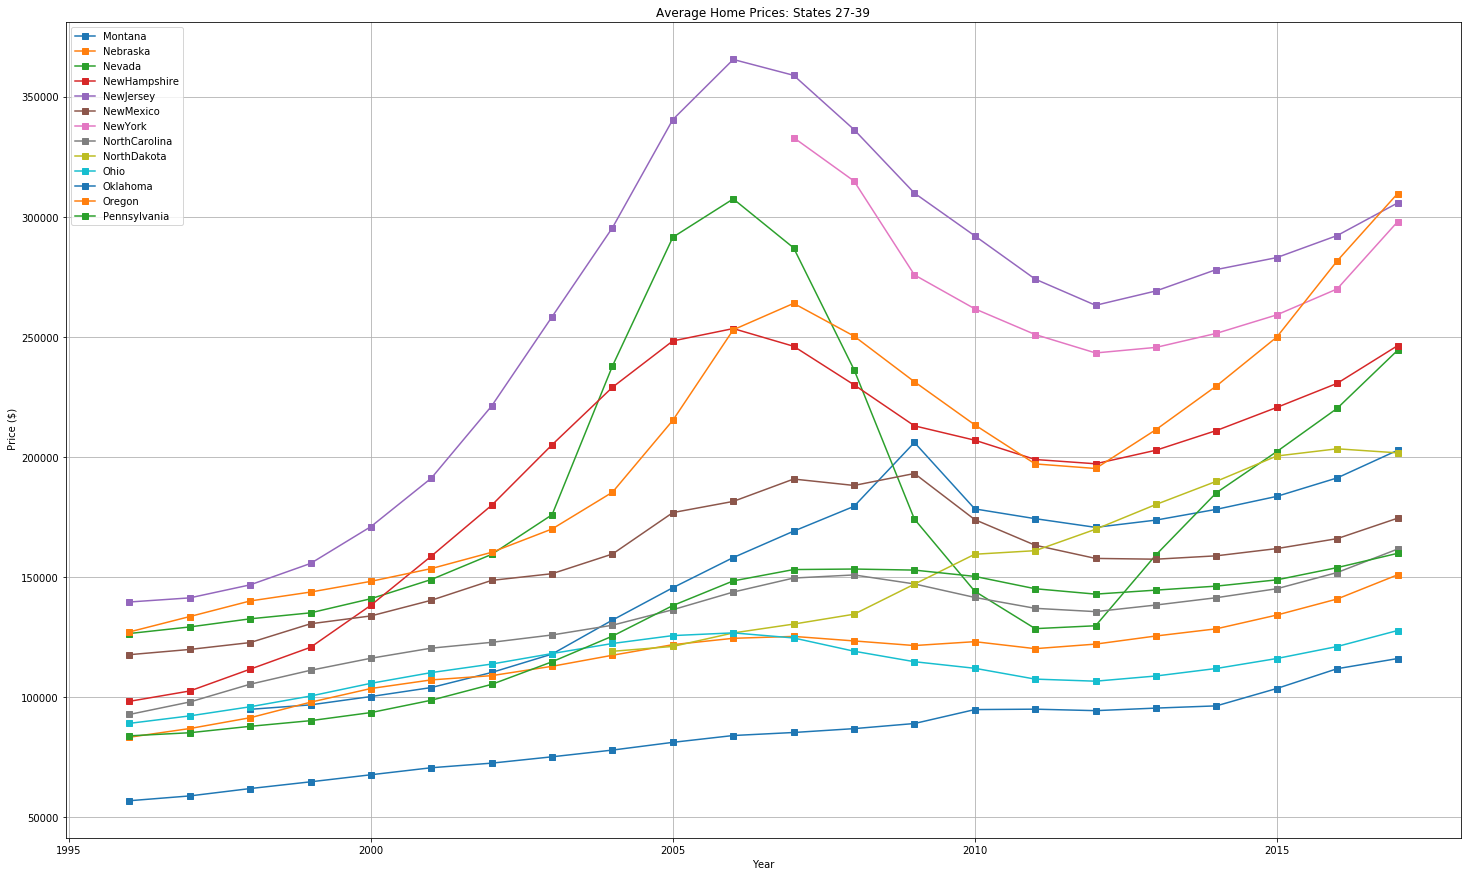

In [11]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 27-39")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[(2*quarter_states):(quarter_states*3)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linestyle='-', marker = 's',label=state)
        plt.legend(loc='best')
plt.show()

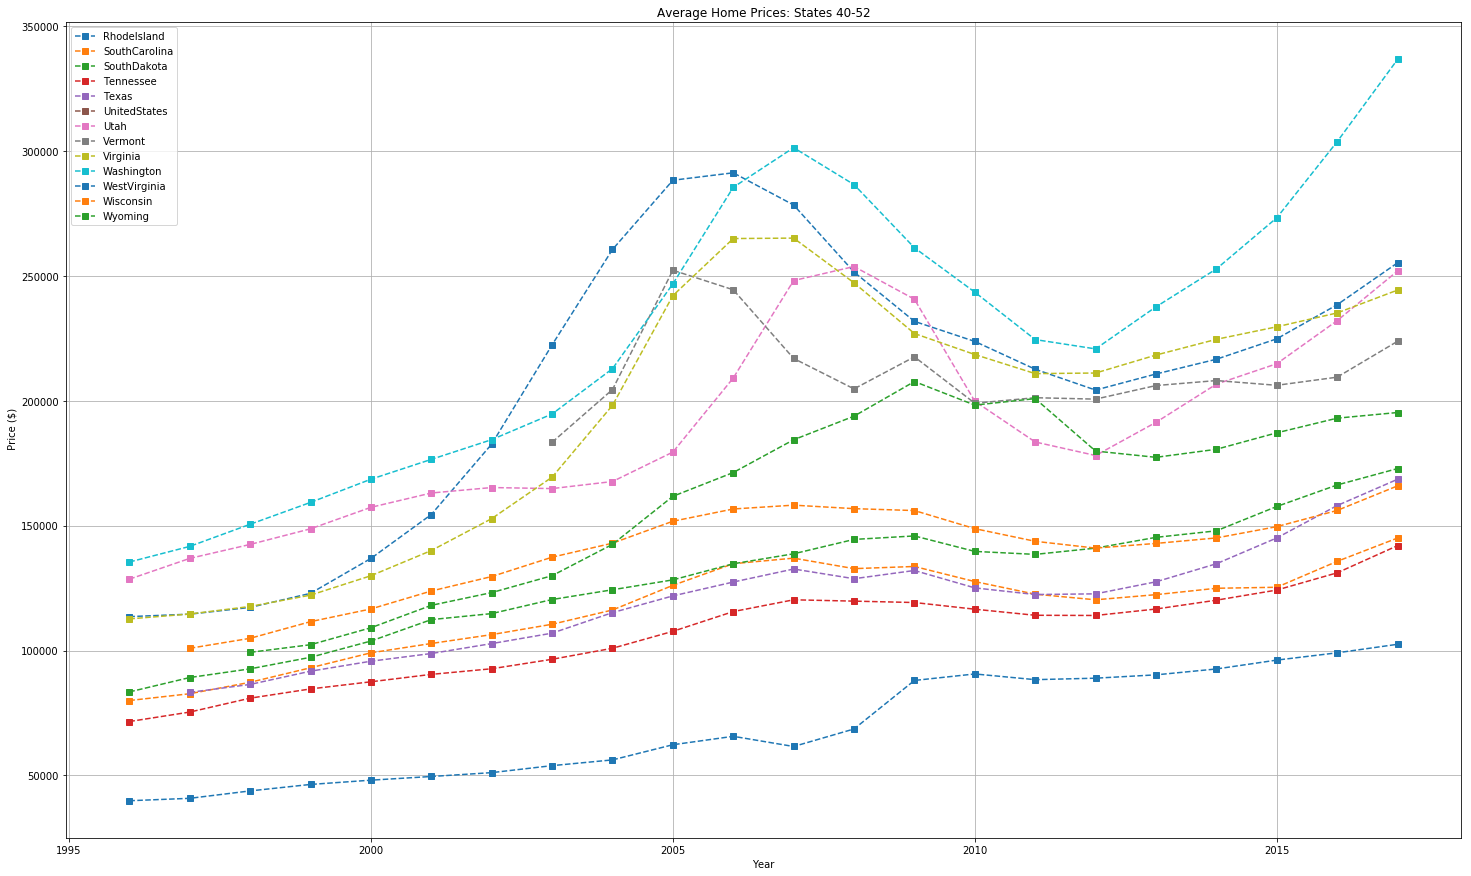

In [12]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 40-52")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[(3*quarter_states):(quarter_states*4)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linestyle='--', marker = 's',label=state)
        plt.legend(loc='best')
plt.show()

In [13]:
# type(stateMeanYear_pdf.mean().sort_values(ascending=False)) returns series
stateavgsorted_list = stateMeanYear_pdf.mean().sort_values(ascending=False)
stateavgsorted_listTT = stateavgsorted_list[:11]
stateavgsorted_listTTindex = stateavgsorted_listTT.index[:11]
stateavgsorted_listTTindex
# stateavgsorted_listTT

Index(['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts',
       'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut',
       'Maryland', 'Colorado'],
      dtype='object', name='RegionName')

In [14]:
# Home

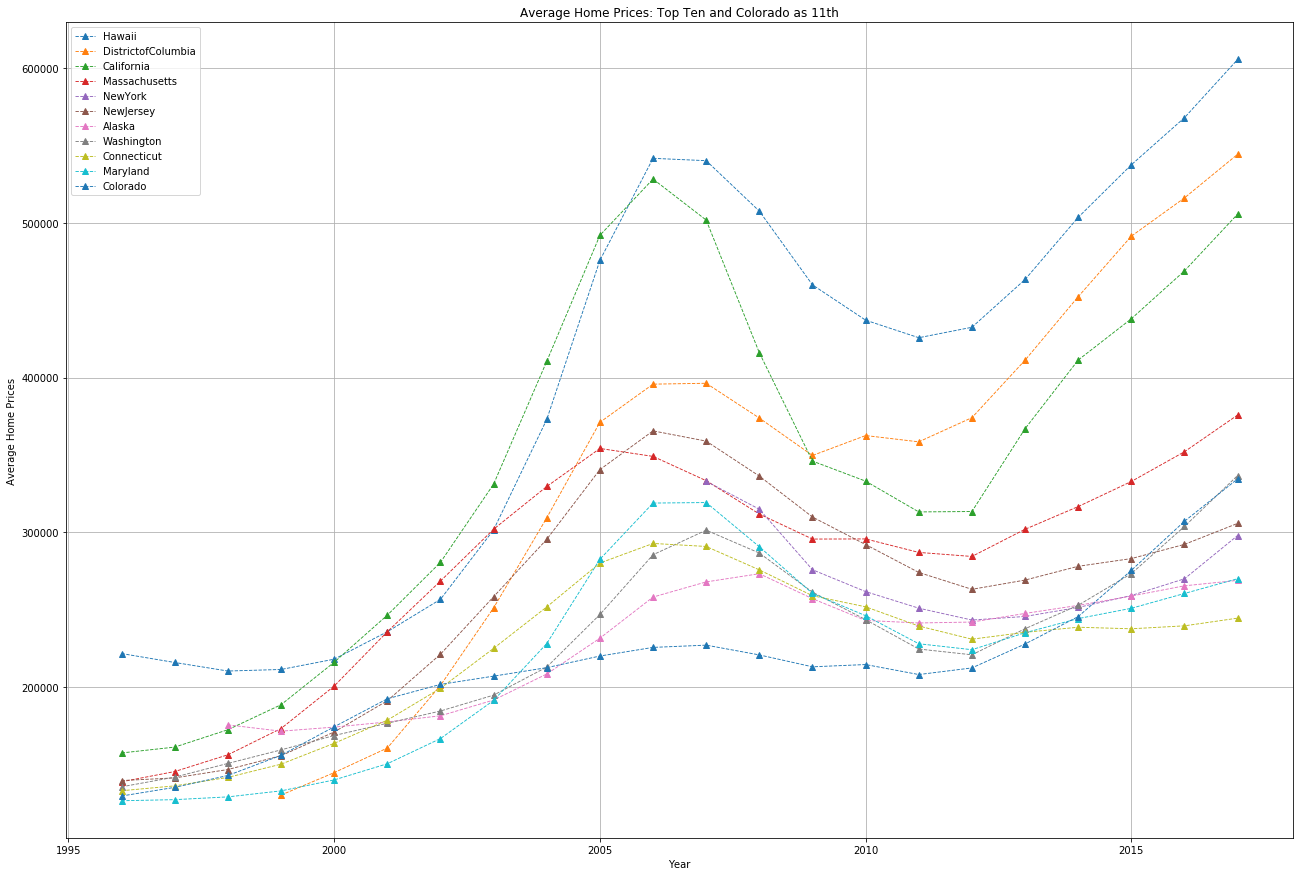

In [15]:
# pre-styling plot
plt.figure(figsize=(22,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: Top Ten and Colorado as 11th")
plt.xlabel("Year")
plt.ylabel(" Average Home Prices ")

stateMeanYear_TTpdf =stateMeanYear_pdf[['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut', 'Maryland', 'Colorado']]
for state in stateMeanYear_TTpdf.columns:
    plt.plot(stateMeanYear_TTpdf.index, stateMeanYear_TTpdf[state], linewidth = 0.9,linestyle ='--', marker = '^',label=state)
    plt.legend(loc='best')
plt.show()

# Rate Comparison of States
    [] copy prices_df and transform into a dataframe consisting of rates for change with respect to last years prices
    [] create a bar chart with top ten states with highest home price increase (mean) over the years of data span

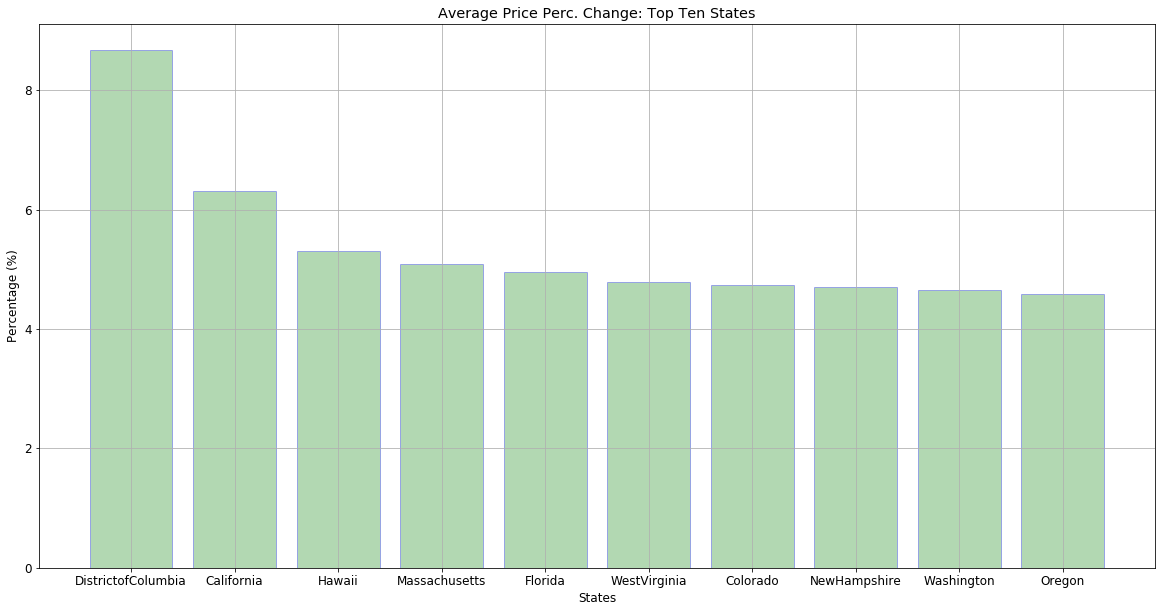

In [16]:
stateperc_df = stateMeanYear_pdf.pct_change()
stateperc_list = stateperc_df.mean()

# plot top ten staets with highest all-time increase
stateperc_TTlist = stateperc_list.sort_values(ascending=False)[:10]
stateperc_TTlist=stateperc_TTlist*100
# pre-styling scatter plot
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 12
plt.grid()
plt.title("Average Price Perc. Change: Top Ten States")
plt.xlabel("States")
plt.ylabel("Percentage (%)")
plt.bar(stateperc_TTlist.index,stateperc_TTlist, color = 'g', edgecolor = 'b' , alpha = 0.3)
plt.show()

# Data Visualization Cont'd: Colorado vs Overall
    [] create a bar chart with line plot for Colorado vs Overall Avg in home percentage price change
    [] define a function for similar analysis in below sections of the team project (ie. median, rental etc.)   

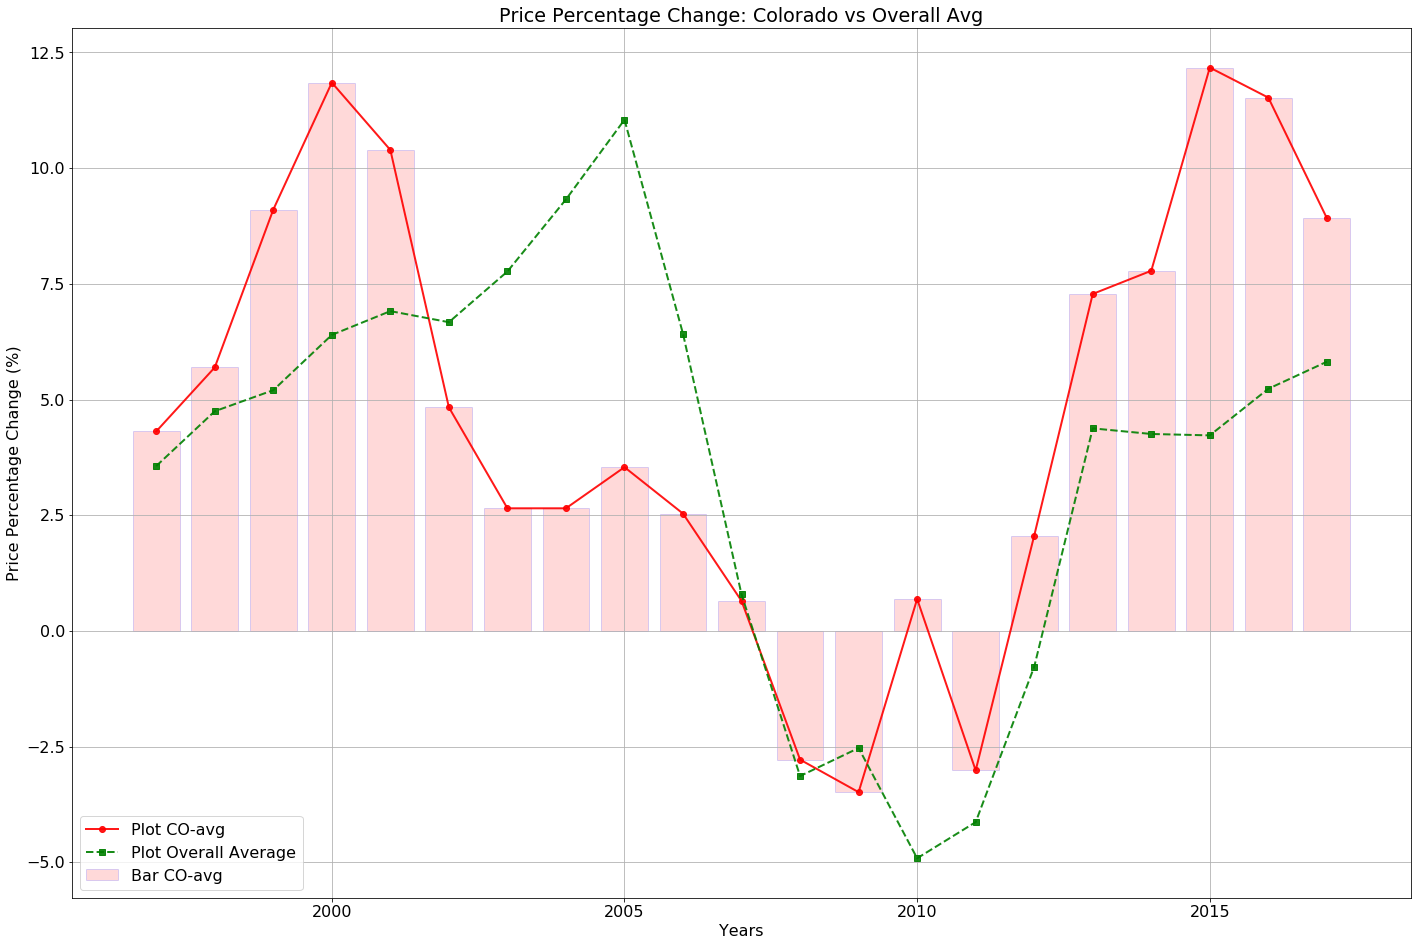

In [17]:
plt.figure(figsize=(24,16))
plt.rcParams["font.size"] = 16
plt.grid()
plt.title("Price Percentage Change: Colorado vs Overall Avg")
plt.xlabel("Years")
plt.ylabel("Price Percentage Change (%)")
plt.bar(stateperc_df.index,stateperc_df['Colorado']*100, color = 'r', edgecolor = 'b' , alpha = 0.15, align='center', label='Bar CO-avg')
plt.plot(stateperc_df.index,stateperc_df['Colorado']*100, color = 'r', linewidth= 2,   marker = 'o', alpha = 0.90, label='Plot CO-avg')
plt.plot(stateperc_df.index,stateperc_df.mean(axis=1)*100, color = 'g', linewidth= 2,linestyle='--', marker = 's', alpha = 0.90, label='Plot Overall Average')
plt.legend(loc='best')
plt.show()

# defining a function:
        [] define a function to create similar charts with different data for next sections
        [] parameters required for above function: 
        def BarLine_vsAvg_onYears(pivoted_Tdf,state,ylabel):
        - pivoted_Tdf: a pivoted-Transposed dataframe with states placed on columns and years on index then transpose
        - state: a state (column) to be compared to overall average
        - ylabel:  a field whose values will be used for comparison, mostly dollar amount (ie. price, rent, fee etc.)

In [19]:
def BarLine_vsAvg_onYears(pivoted_Tdf,state,ylabel):
    plt.figure(figsize=(24,10))
    plt.rcParams["font.size"] = 16
    plt.grid()
    plt.title(state + " vs Overall Average")
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.bar(pivoted_Tdf.index,pivoted_Tdf[state], color = 'c',  alpha = 0.35, align='center', label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf[state], color = 'b', linewidth= 1,   marker = 'o', alpha = 0.90, label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1), color = 'g', linewidth= 2, linestyle ='--', marker = 's', alpha = 0.90, label='Overall Avg')
    plt.legend(loc='best')
    plt.show()

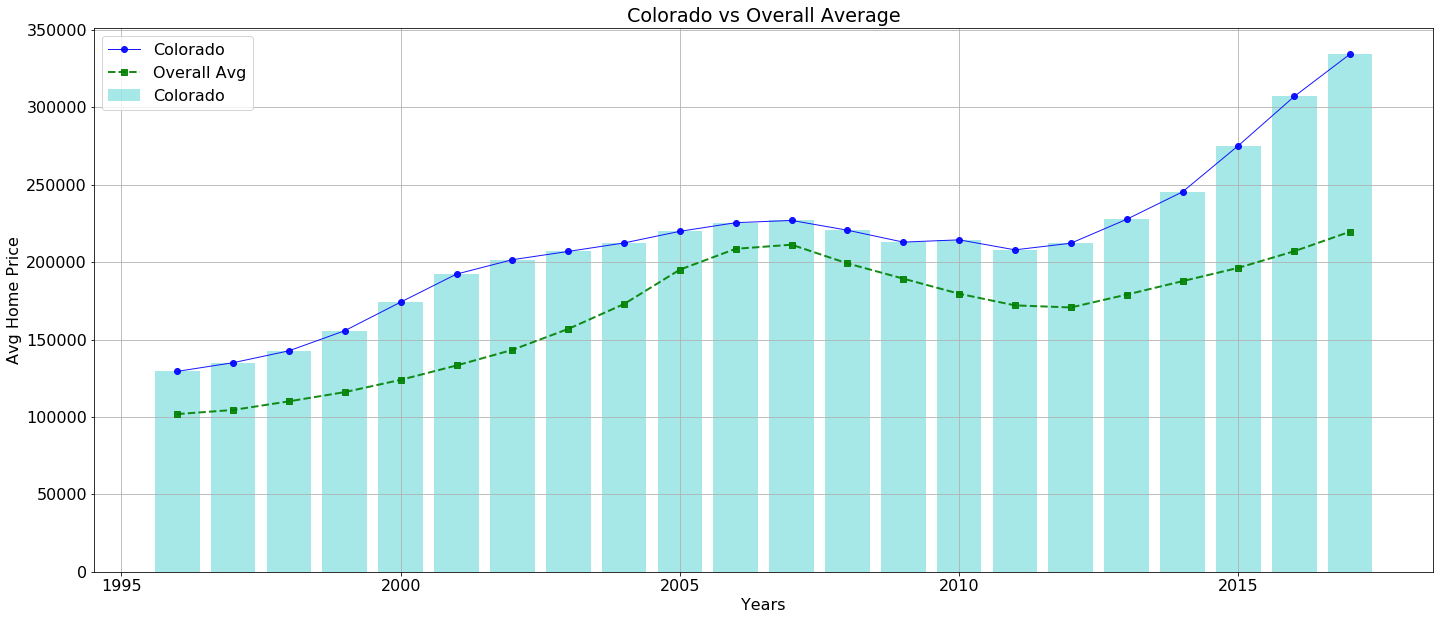

In [20]:
BarLine_vsAvg_onYears(pivoted_Tdf=stateMeanYear_pdf,state='Colorado',ylabel='Avg Home Price')

        [] modify above function for percentage output when comparing rates

In [22]:
def BarLine_vsAvg_onYears_Perc(pivoted_Tdf,state,ylabel):
    plt.figure(figsize=(24,12))
    plt.rcParams["font.size"] = 16
    plt.grid()
    plt.title(state + " vs Overall Average")
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.bar(pivoted_Tdf.index,pivoted_Tdf[state]*100, color = 'r',  alpha = 0.15, align='center', label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf[state]*100, color = 'r', linewidth= 2,   marker = 'o', alpha = 0.90, label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1)*100, color = 'g', linewidth= 2, linestyle ='--', marker = 's', alpha = 0.90, label='Overall Avg')
    plt.legend(loc='best')
    plt.show()

# How about rent ?
        [] create all required parameters to run a function thus state (CO) vs Overall comparison could be made:
            (1) pivotedT_df (2)state (3) ylabel -values-

In [26]:
# narrowing down our scope on extracted fields/columns below
rental_df = state_df[['RegionName','MedianRentalPrice_AllHomes','Year']]
# pivoting dataframe
rentalpivoted_Tdf = rental_df.groupby(['Year','RegionName'])['MedianRentalPrice_AllHomes'].mean().reset_index().pivot(index='Year', columns = 'RegionName', values = 'MedianRentalPrice_AllHomes')
rentalpivoted_Tdf.head()
# drop all those array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007, 2008, 2009]
# all NaN and partially NaN on 2010 row
rentalpivoted_Tdf.head(25)

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# define a function:
        [] purpose of this function will be plotting set of chosen states to compare for analysis
        [] parameters required for above function: 
        def PlotStateList(pivoted_Tdf,states_list,ylabel):
        - pivoted_Tdf: a pivoted-Transposed dataframe with states placed on columns and years on index then transpose
        - states_list: those in the list will be plotted for comparison
        - ylabel:  a field whose values will be used for comparison, mostly dollar amount (ie. price, rent, fee etc.)

In [27]:
def PlotStateList(pivoted_Tdf,states_list,ylabel):
    plt.figure(figsize=(25,15))
    plt.rcParams["font.size"] = 16
    plt.grid(True)
    plt.title(ylabel)
    plt.xlabel("Years")
    plt.ylabel(ylabel)

    for state in states_list:
        plt.plot(pivoted_Tdf.index, pivoted_Tdf[state], linestyle='--', marker = 'o',label=state)
        plt.legend(loc='best')
        
    plt.bar(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1), color = 'g',  alpha = 0.30, align='center', label = 'Average All States')
    plt.legend(loc='best')
    plt.show()

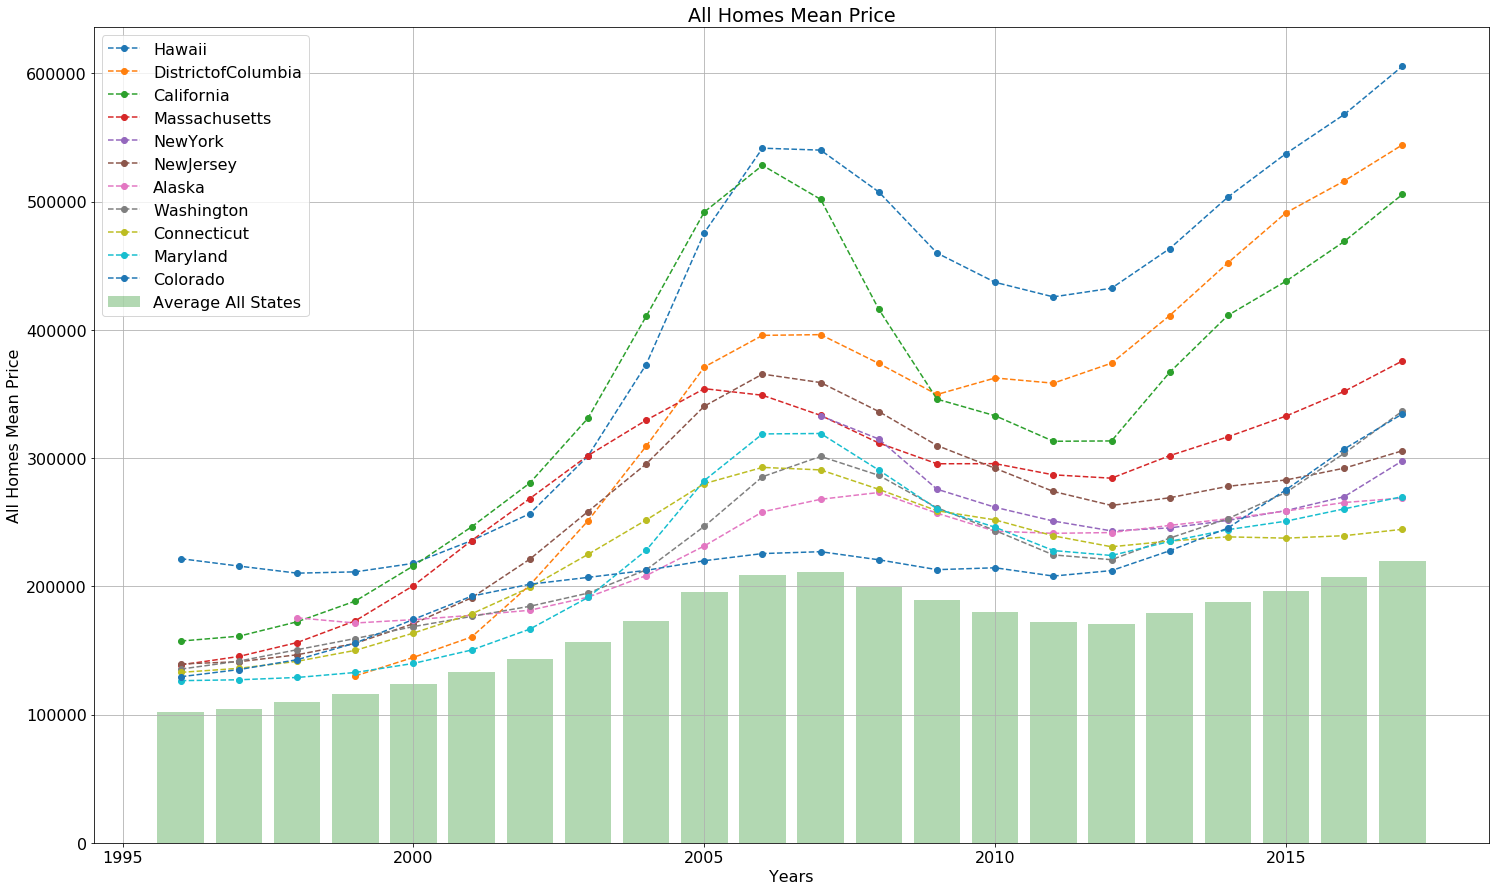

In [28]:
# test run with TopTenStates above created
TopTenStates_list = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut', 'Maryland', 'Colorado']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf,states_list =TopTenStates_list,ylabel='All Homes Mean Price')

# 'Cause CO  got high... Because I got high..
        [] multiple plots of listed states to find similarity with CO trend 

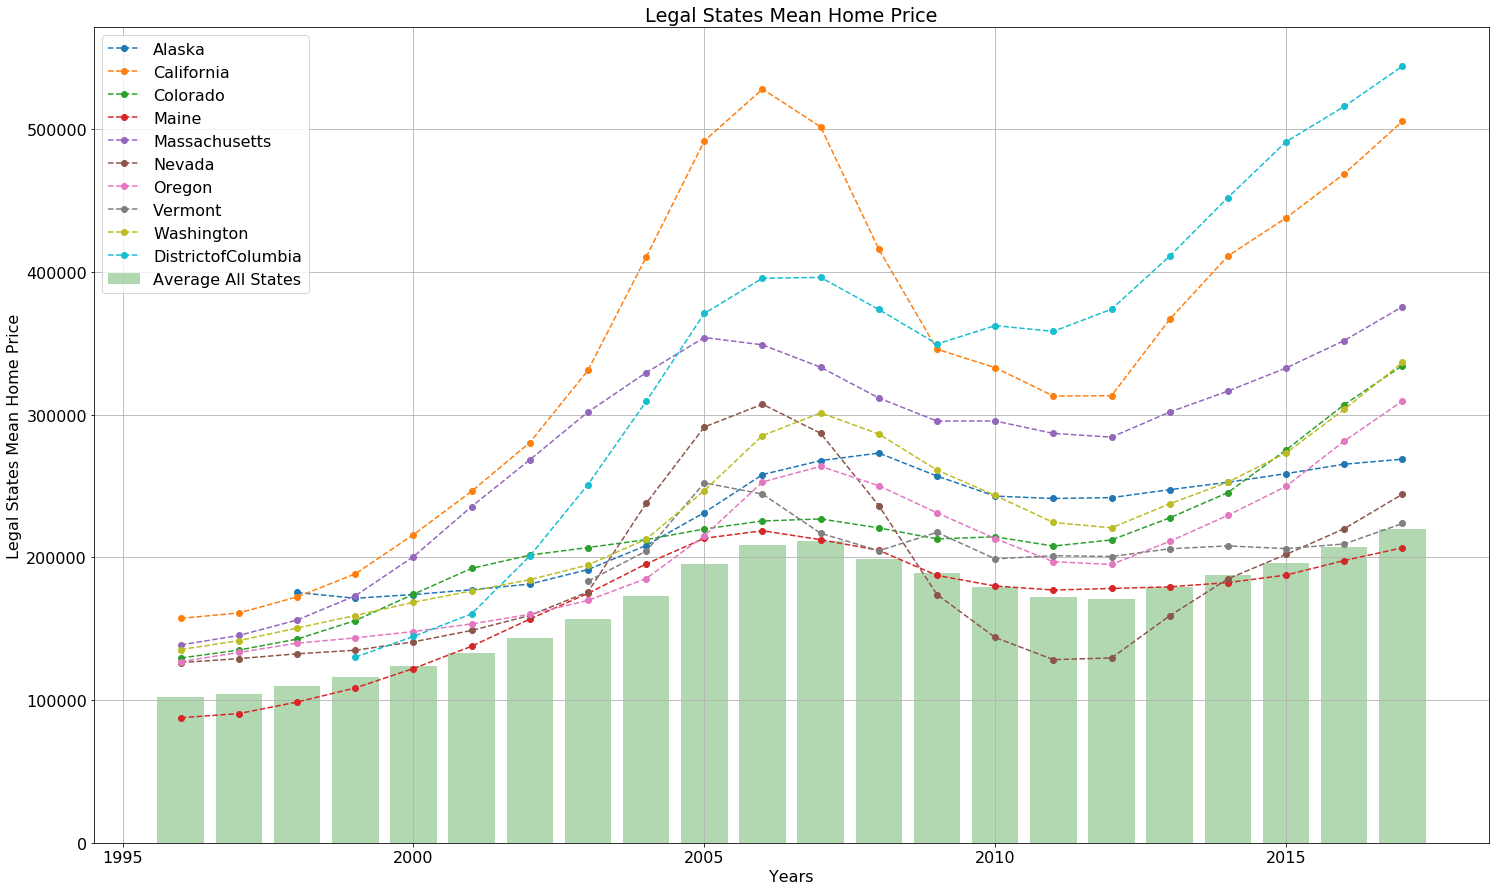

In [29]:
# The recreational use of cannabis is legal in 9 states 
LegalStates_list = ['Alaska', 'California', 'Colorado', 'Maine', 'Massachusetts', 'Nevada', 'Oregon', 'Vermont', 'Washington', 'DistrictofColumbia']

PlotStateList(pivoted_Tdf=stateMeanYear_pdf,states_list =LegalStates_list,ylabel='Legal States Mean Home Price')

# CO's bordering states: are they as popular?
    [] multiple plots of border states to see price trend similarity

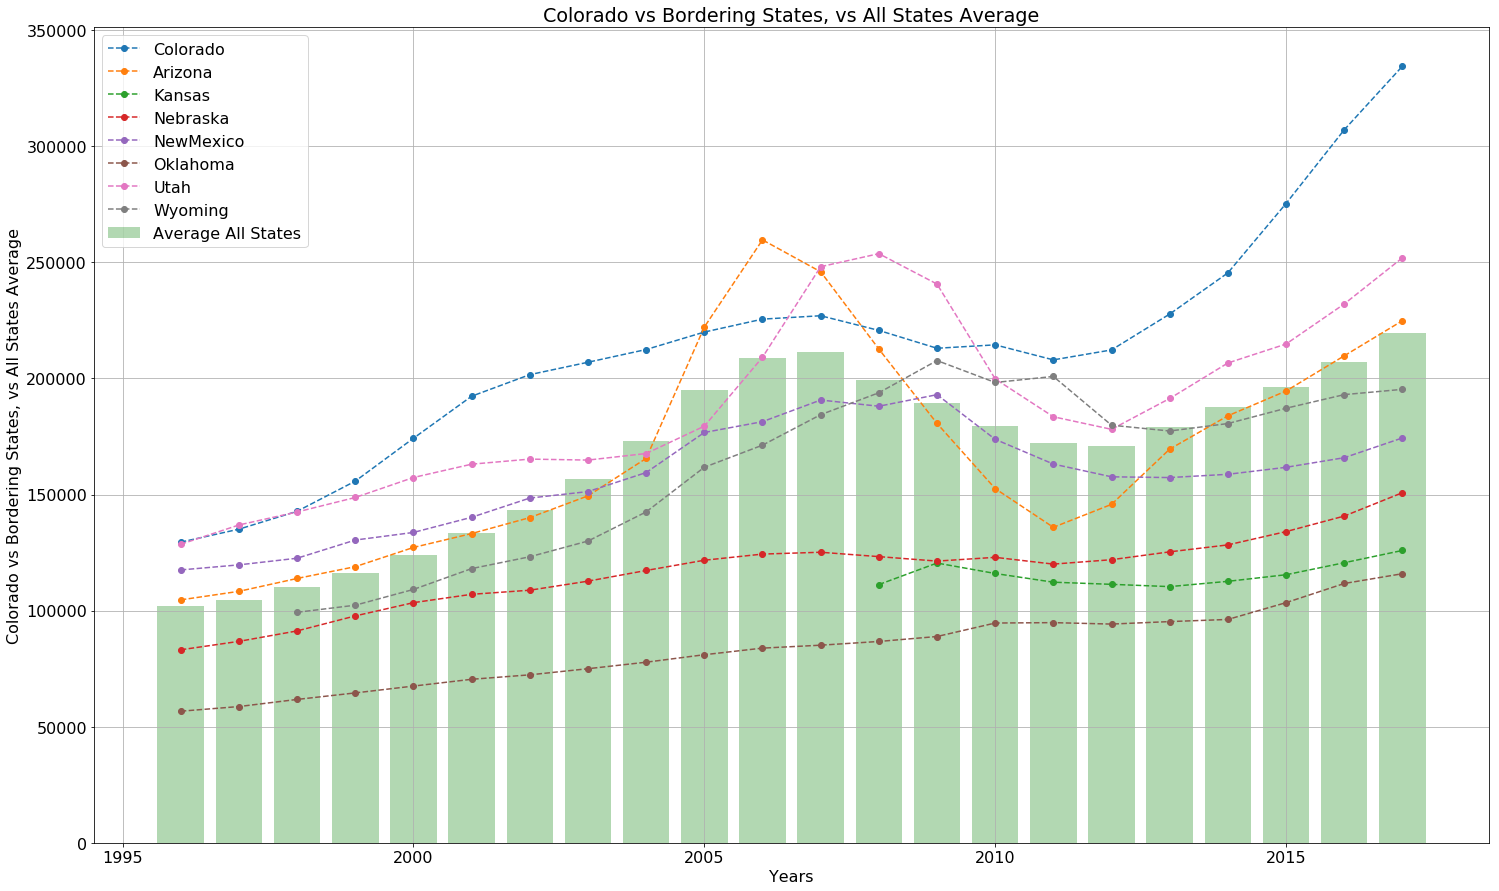

In [30]:
borderingstates_list = ['Colorado', 'Arizona', 'Kansas', 'Nebraska', 'NewMexico', 'Oklahoma', 'Utah', 'Wyoming']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf,
              states_list =borderingstates_list,
              ylabel='Colorado vs Bordering States, vs All States Average')

In [31]:
# Information source: The World Almanac of the U.S.A.. Mahwah: World Almanac Books, 1996. 
file = 'state_elevation_data.csv'
elevation_df = pd.read_csv(file)
elevation_df.head(10)

,HighestRank,State,HighPoint,LowPoint,MeanElevation
0,1,Colorado,"14,440","3,315","6,800"
1,2,Wyoming,"13,804","3,099","6,700"
2,3,Utah,"13,528","2,000","6,100"
3,4,NewMexico,"13,161","2,842","5,700"
4,5,Nevada,"13,140",479,"5,500"
5,6,Idaho,"12,662",710,"5,000"
6,7,Arizona,"12,633",70,"4,100"
7,8,Montana,"12,799","1,800","3,400"
8,9,Oregon,"11,239",0,"3,300"
9,10,Hawaii,"13,796",0,"3,030"


# Aint no mountain high enough
        [] find state-elevation data and plot highest states 

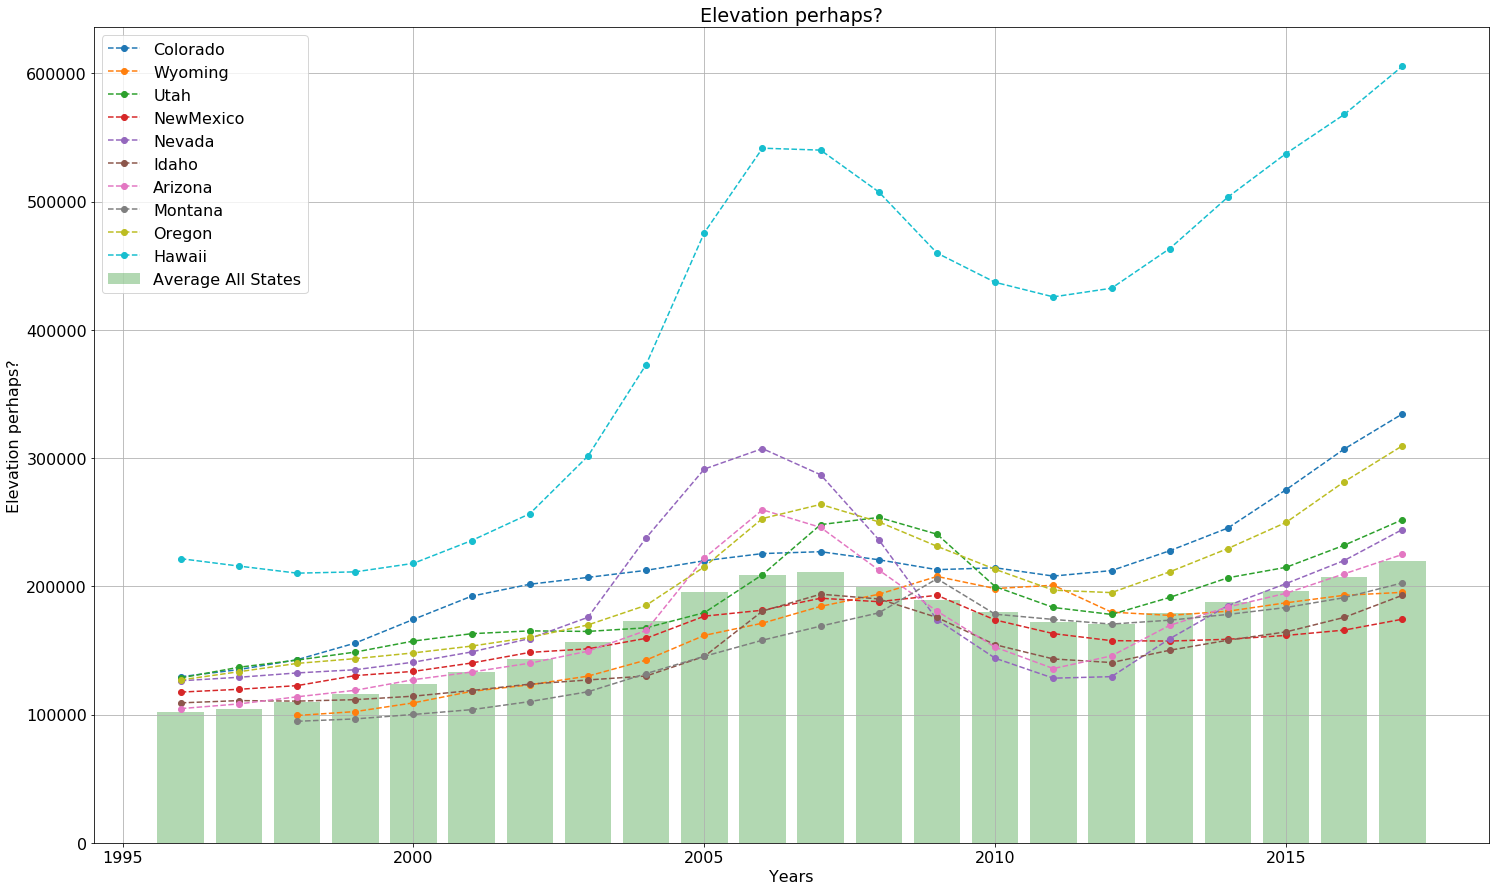

In [32]:
highest_stateslist = elevation_df[0:10]['State']
# highest_stateslist= ['Colorado', 'Wyoming', 'Utah', 'NewMexico', 'Nevada', 'Idaho', 'Arizona', 'Montana', 'Oregon', 'Hawaii']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= highest_stateslist, ylabel="Elevation perhaps?")

# Statistical Analysis:
        [] find a built-in function from scipy or numpy to find similarity of two arrays /state trends: pearsonr(CO,state)
        [] then define a function to loop through states comparing each with Colorado
        [] store all pearson coefficients of each state vs. Colorado on a list

In [107]:
from scipy import stats

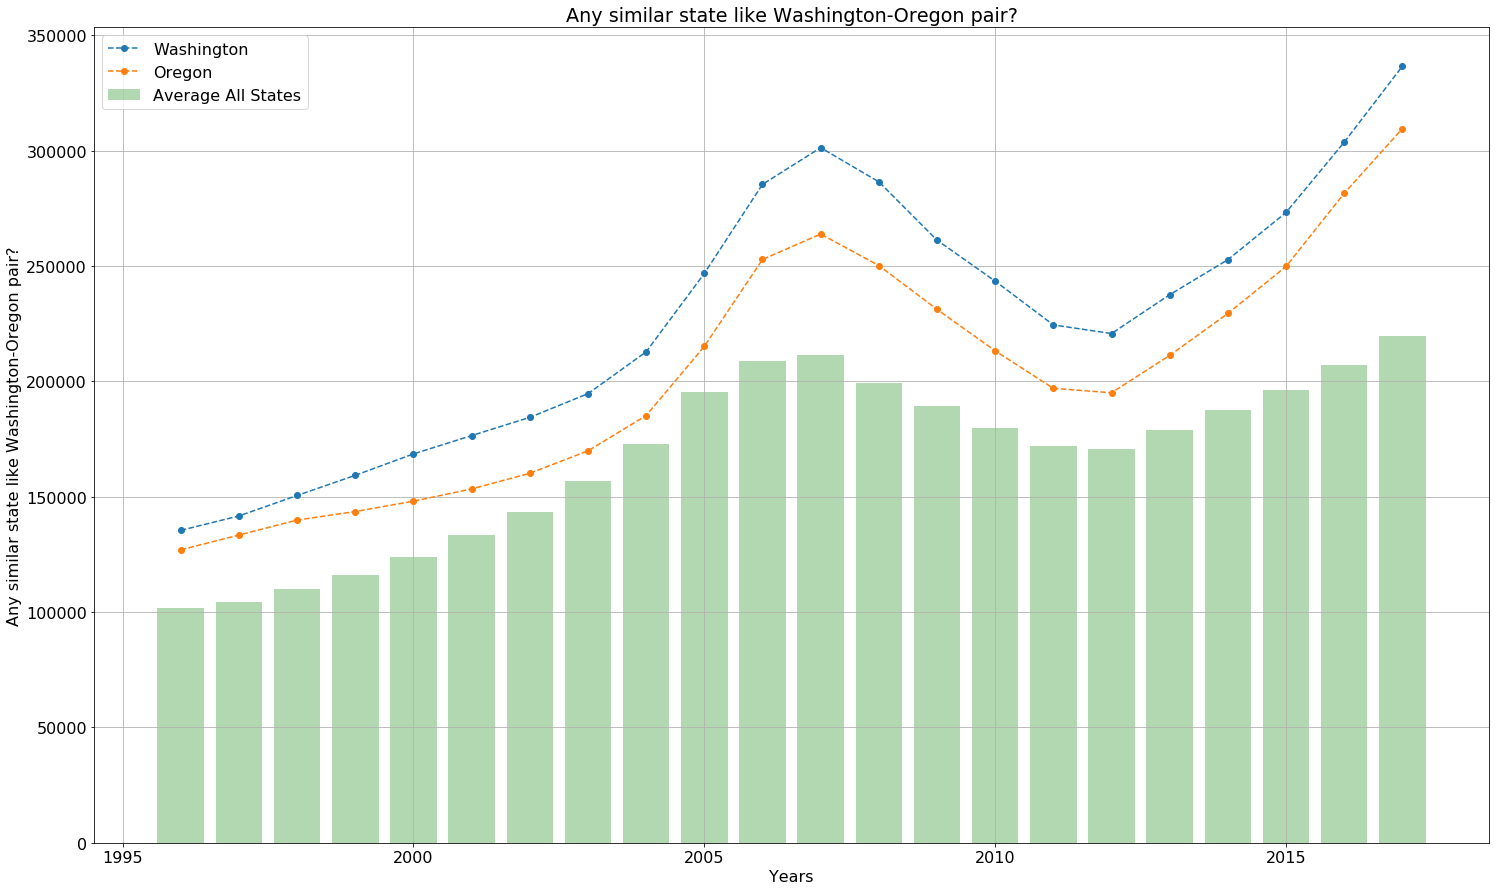

In [108]:
# running some test states and plot result before function
# (1.0, 0.0) perfect result, received only when two same arrays/states were
a=stateMeanYear_pdf['Washington']
b=stateMeanYear_pdf['Oregon']
# print(pearsonr(a,b))
list_similar = ['Washington', 'Oregon']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similar, ylabel="Any similar state like Washington-Oregon pair?")

# define a statistical similarity function
        [] scipy library for built-in function pearsonr(a,b) confirmed above
        [] find the highest Pearson Coefficient for CO
        [] plot those states to visualize their similarity with Colorado

In [109]:
def PearsonColorado(state):
    a_list = []
    b_list = []
    state_list = []

    for state in stateMeanYear_pdf.columns:
        a=stateMeanYear_pdf['Colorado']
        b=stateMeanYear_pdf[state]
        x,y = pearsonr(a,b)
        state_list.append(str(state))
        a_list = a_list.append(x)
        b_list.append(y)

PearsonCO_df = pd.DataFrame({'state': state_list,'pearson_a' : a_list,'pearson_b' : b_list})


In [116]:
# PearsonColorado(state = 'Colorado')
# # PearsonCO_df1

In [154]:
PearsonCO_df

,state,pearson_a,pearson_b
0,Alabama,0.766029,3.238444e-05
1,Alaska,NaN,1.000000e+00
2,Arizona,0.734944,9.782182e-05
3,Arkansas,0.871390,1.300479e-07
4,California,0.832514,1.539874e-06
5,Colorado,1.000000,0.000000e+00
6,Connecticut,0.676540,5.457643e-04
7,Delaware,0.776446,2.152881e-05
8,DistrictofColumbia,NaN,1.000000e+00
9,Florida,0.715353,1.823116e-04


#  awww aren't they cute
        [] Washington - Oregon pair as a sample
        [] find a state that shows high similarity in trends over the years to Colorado

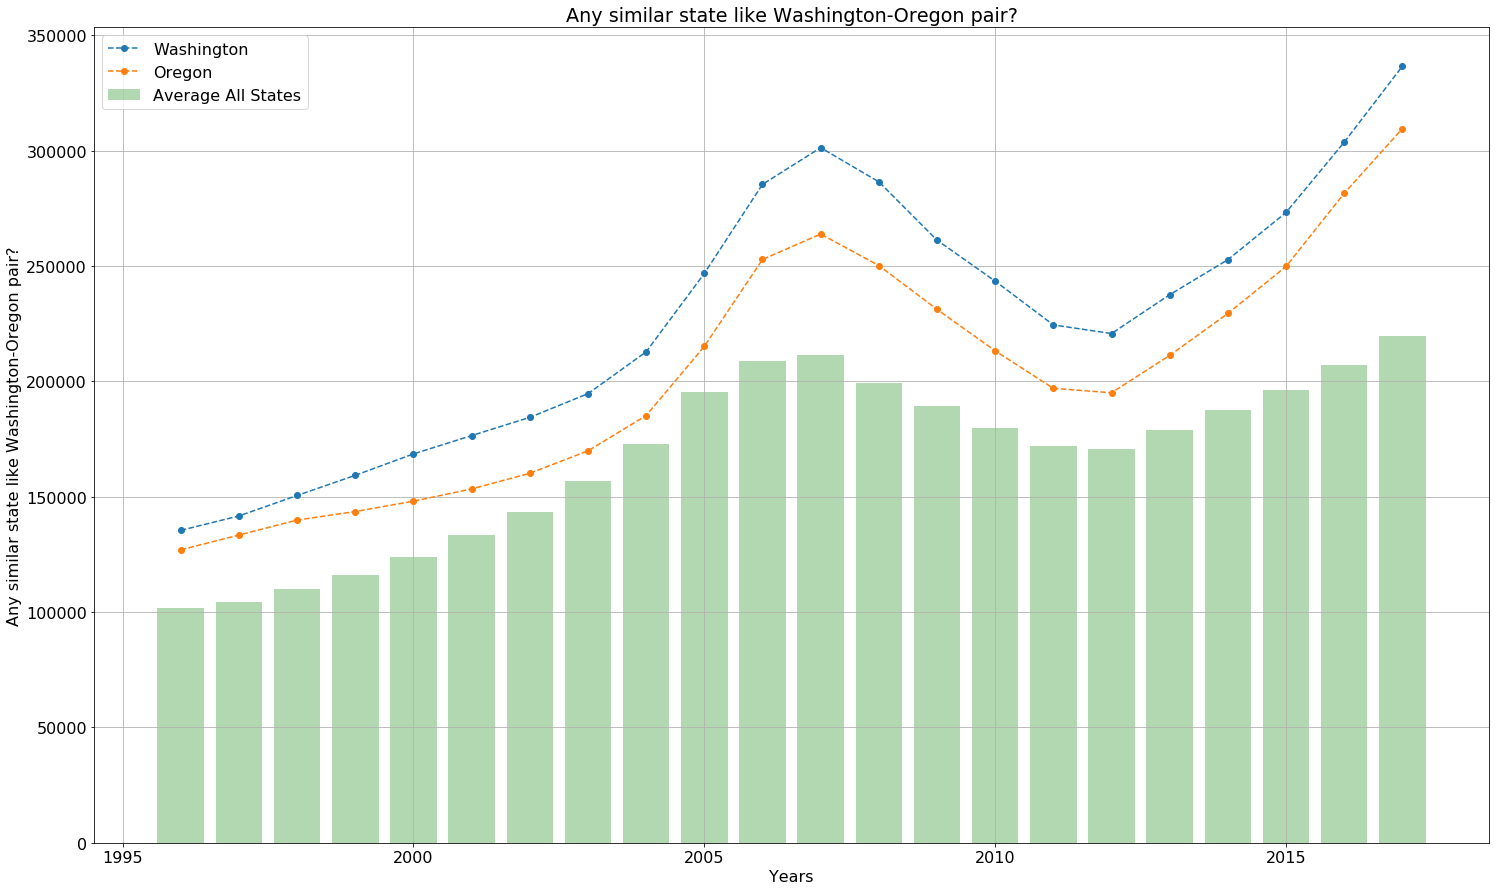

In [117]:
list_similarWasOre = ['Washington', 'Oregon']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similarWasOre, ylabel="Any similar state like Washington-Oregon pair?")

# Swipe right if match <3

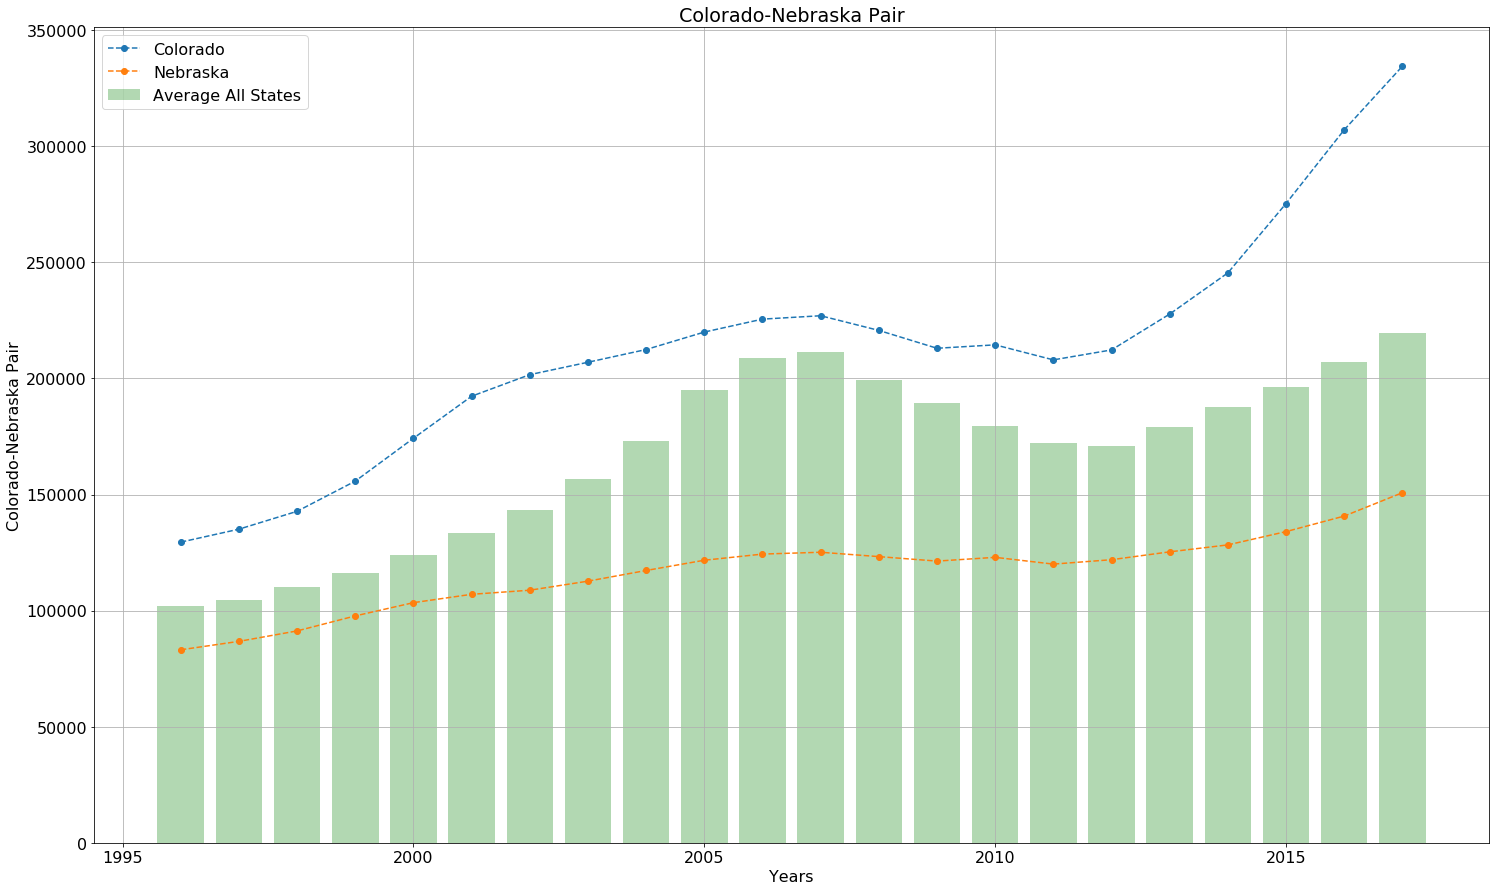

In [76]:
list_similar1 = ['Colorado', 'Nebraska']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similar1, ylabel="Colorado-Nebraska Pair")

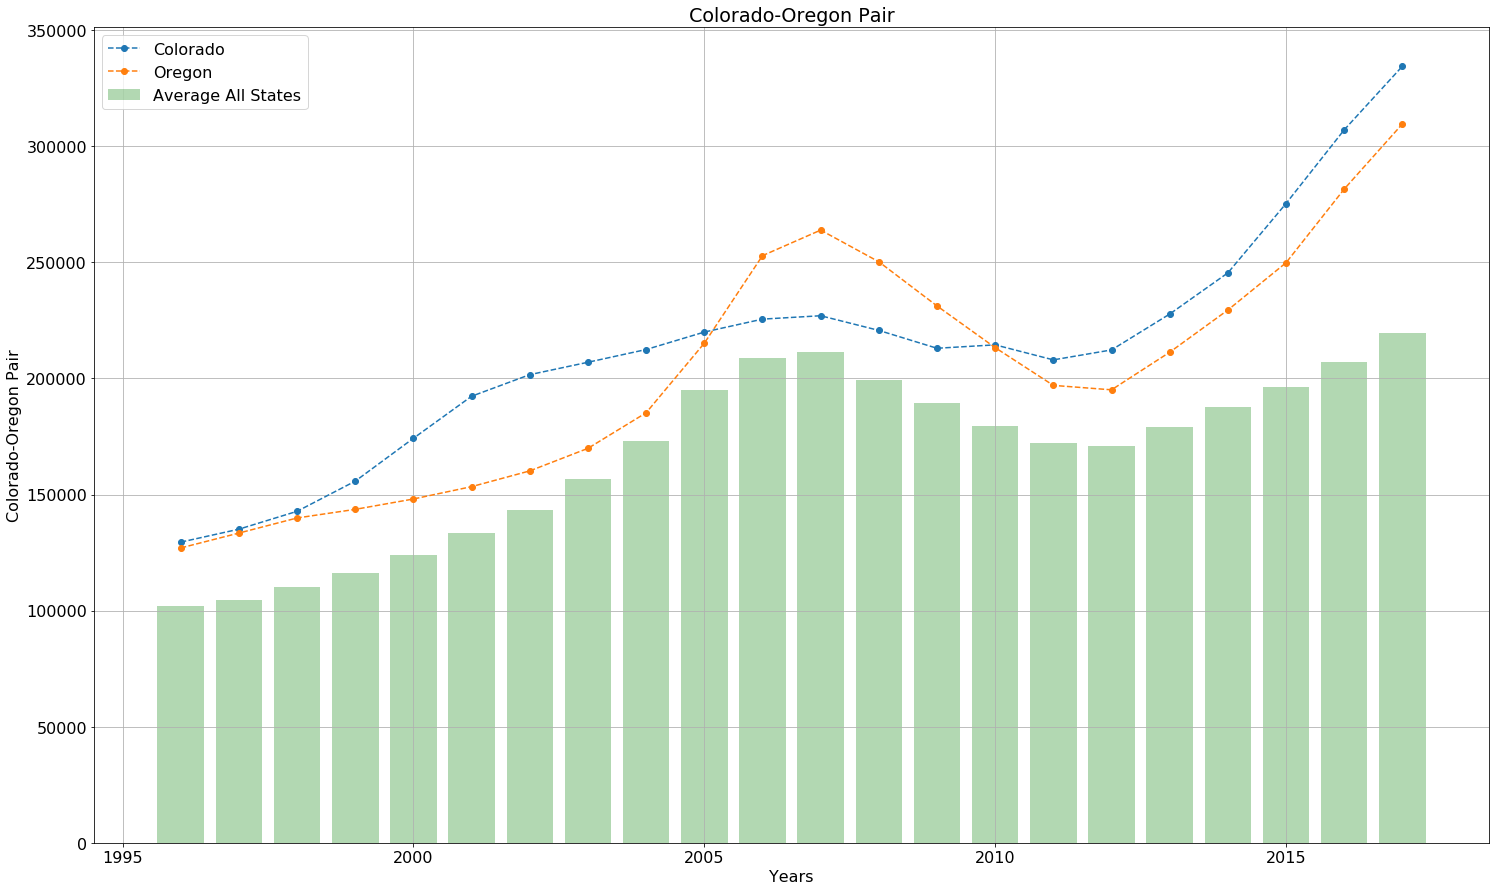

In [77]:
list_similar2 = ['Colorado', 'Oregon']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similar2, ylabel="Colorado-Oregon Pair")

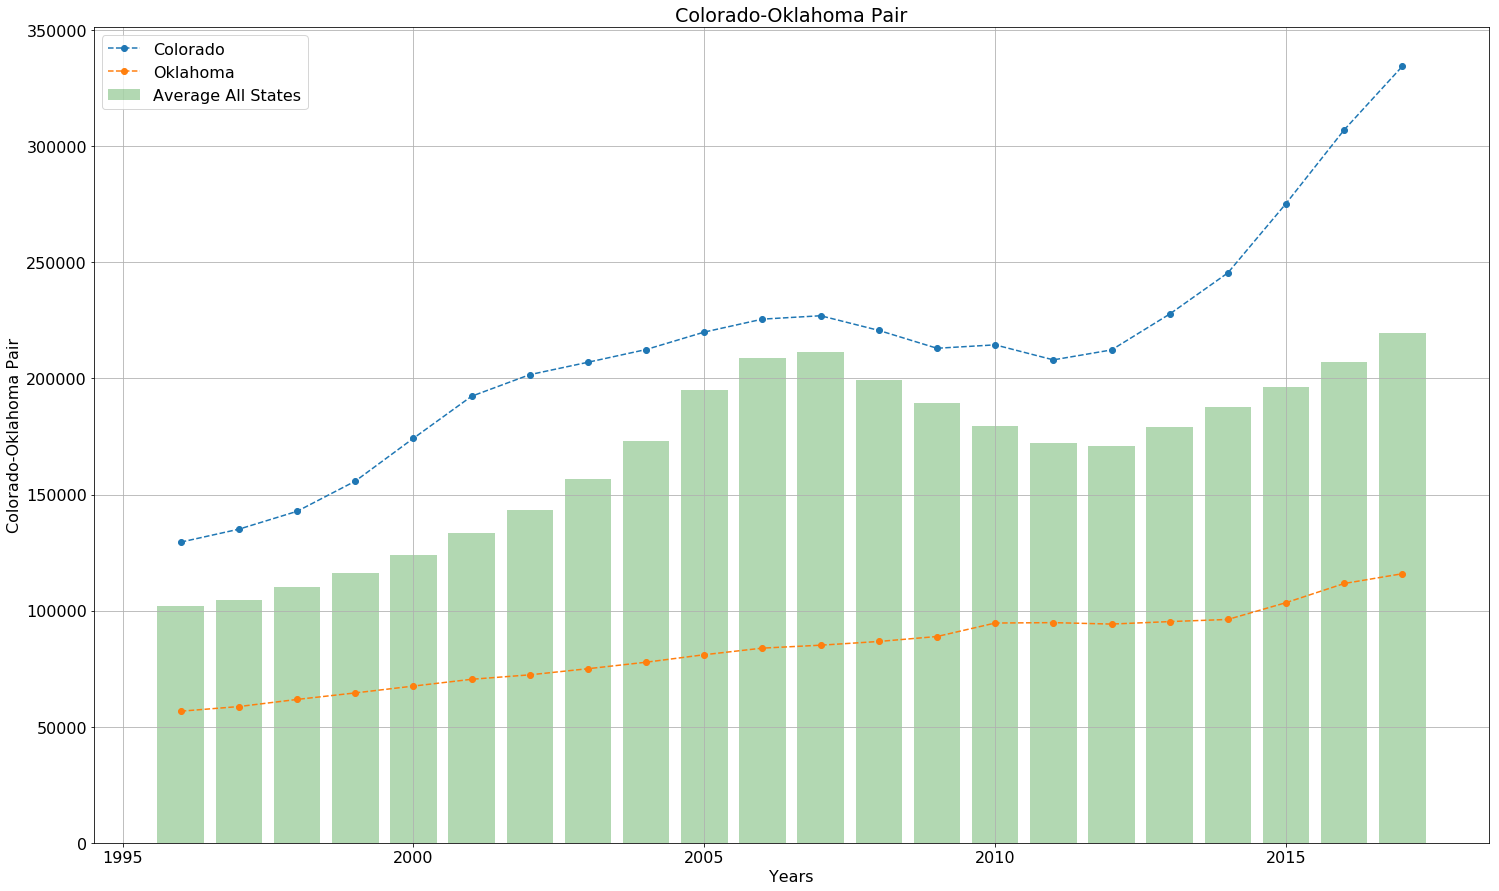

In [79]:
list_similar3 = ['Colorado', 'Oklahoma']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similar3, ylabel="Colorado-Oklahoma Pair")

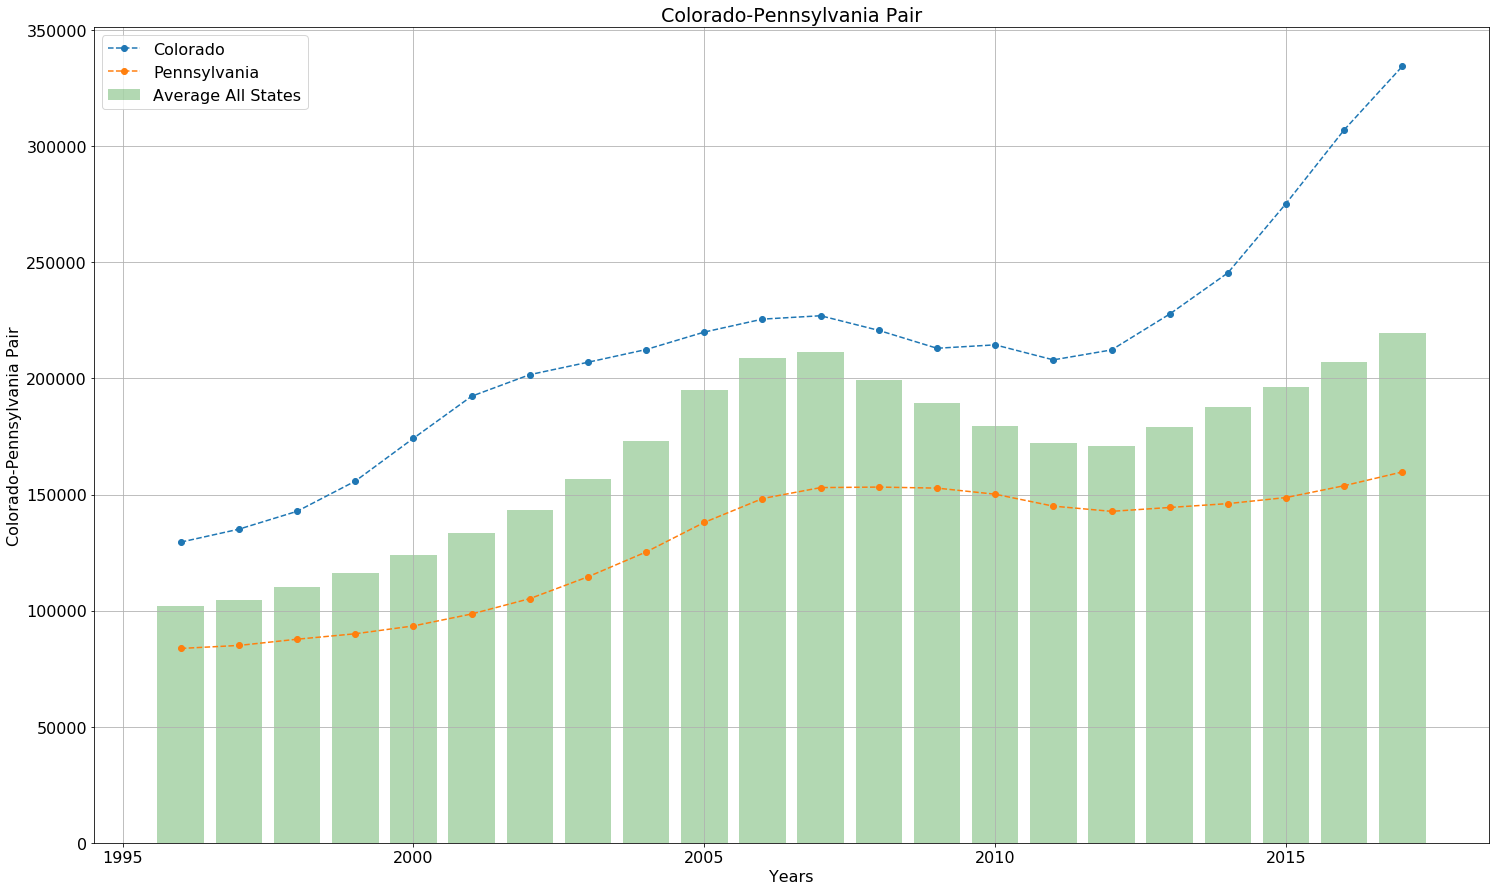

In [80]:
list_similar4 = ['Colorado', 'Pennsylvania']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similar4, ylabel="Colorado-Pennsylvania Pair")

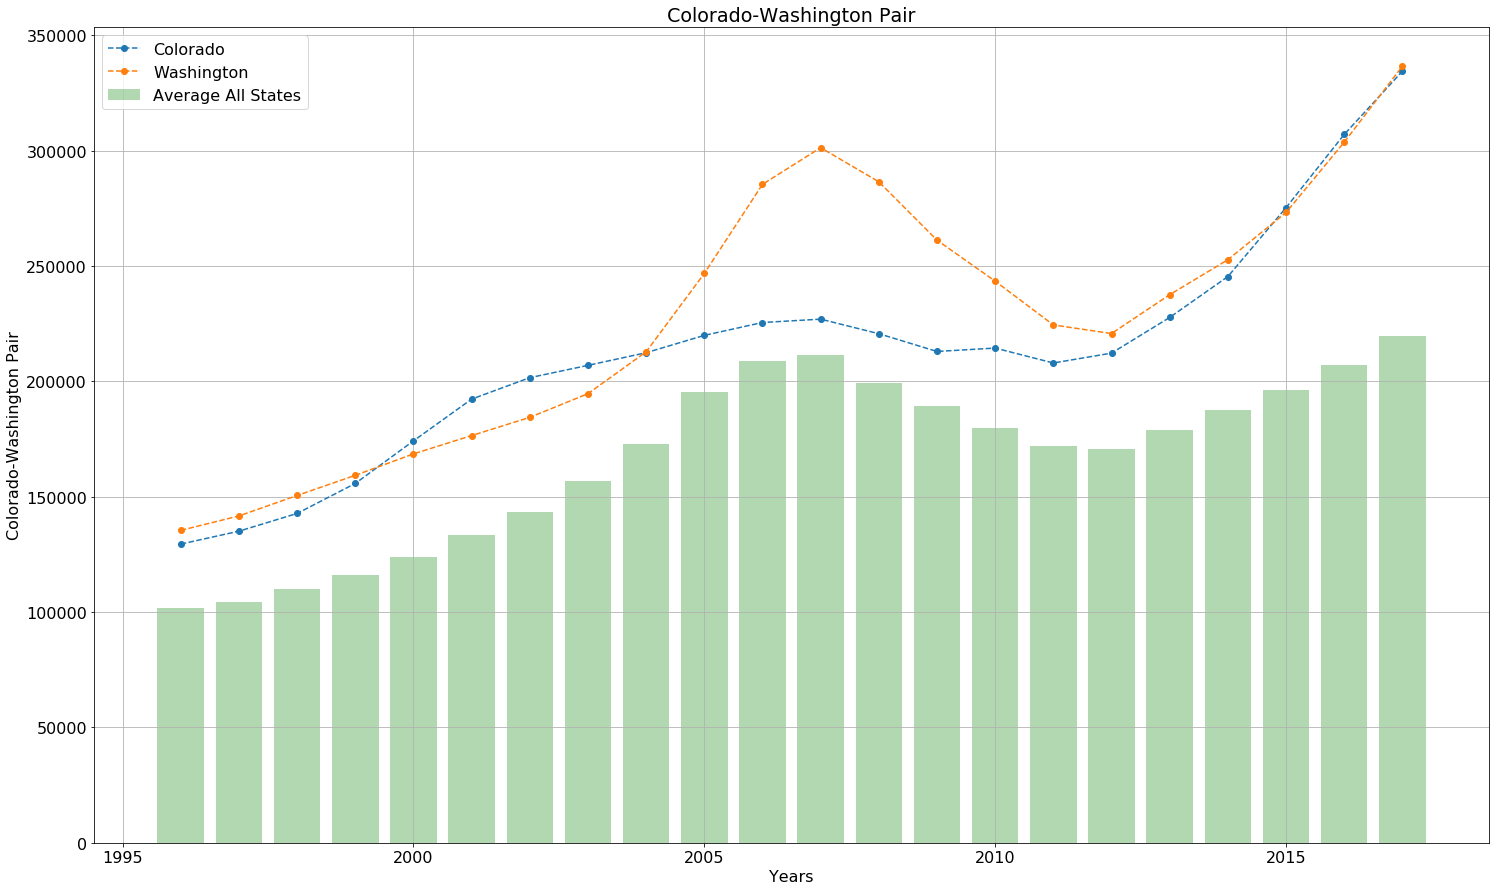

In [81]:
list_similar5 = ['Colorado', 'Washington']
PlotStateList(pivoted_Tdf=stateMeanYear_pdf, states_list= list_similar5, ylabel="Colorado-Washington Pair")